### Plot Male and Female photos

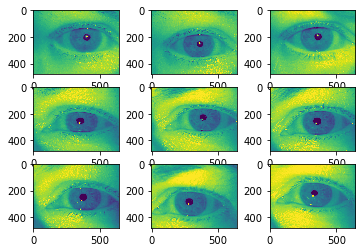

In [1]:
# plot iris data
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset

from os import listdir
from os.path import isfile, join
folder = '../data/raw/iris_data/LG2200/gender/'
onlyfiles = [f for f in listdir(folder+'Female') if isfile(join(folder+'Female', f))]

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder+'Female/'+onlyfiles[i]
	# load image pixels
	image = imread(filename, 'tiff')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

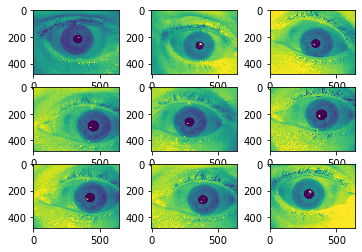

<Figure size 432x288 with 0 Axes>

In [2]:
# plot iris data
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '../data/raw/iris_data/LG2200/gender/'
onlyfiles = [f for f in listdir(folder+'Male') if isfile(join(folder+'Male', f))]

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder+'Male/'+onlyfiles[i]
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
fig1 = pyplot.gcf()
pyplot.show()
pyplot.draw()
pyplot.savefig('../data/iris_results.png')

### Preprocess photos

In [3]:
# load iris dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = '../data/raw/train/'

photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('cat'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('iris_Male.npy', photos)
save('iris_female.npy', labels)

Using TensorFlow backend.


(25000, 200, 200, 3) (25000,)


In [4]:
# load and confirm the shape
from numpy import load
photos = load('iris_Male.npy')
labels = load('iris_female.npy')
print(photos.shape, labels.shape)

(25000, 200, 200, 3) (25000,)


### Pre-Process Photos into Standard Directories

In [3]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import random

# create directories
dataset_home = '../data/processed/iris_data/LG2200/gender/'

subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['Male/', 'Female/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
        
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories

root_directory = '../data/raw/iris_data/LG2200/gender/'
subdirs = ['Male/', 'Female/']
for subdir in subdirs:
    src_directory = root_directory + subdir

    # Let's get the captured irises.
    list_files = listdir(src_directory)
    # There are some irises that doesn't have identification. So we have to filter them first.
    list_files_ok = [sub for sub in list_files if 'd' in sub]
    list_users_with_id = [sub.split('d')[1].split('.')[0] for sub in list_files_ok]

    # We identify the users by deleting repeated users
    list_unique_users = list(set(list_users_with_id))
    print(len(list_unique_users))

    # define ratio of pictures to use for validation
    val_ratio = 0.25

    # Split train - test
    random.shuffle(list_unique_users)
    len_test = round(val_ratio*len(list_unique_users))
    len_train = len(list_unique_users) - len_test
    train_users = list_unique_users[0:len_train]
    test_users = list_unique_users[len_train:]

    train_set = []
    for i in train_users:
        for str_element in list_files_ok:
            if i == str_element.split('d')[1].split('.')[0]:
                train_set.append(str_element)

    test_set = []
    for j in test_users:
        for str_element in list_files_ok:
            if j == str_element.split('d')[1].split('.')[0]:
                test_set.append(str_element)
                
    # Let's copy the different datasets  
    dst_dir = 'train/'
    for file in train_set:
        src = src_directory + '/' + file
        dst = dataset_home + dst_dir + subdir  + file    
        copyfile(src, dst)

    dst_dir = 'test/'
    for file in test_set:
        src = src_directory + '/' + file
        dst = dataset_home + dst_dir + subdir  + file    
        copyfile(src, dst)

788
818


In [10]:
# Small routine to check data leakage 
var = '42'

lista = []
for str_element in train_set:
    lista.append(var == str_element.split('d')[1].split('.')[0])

print('train set')
for i in range(len(np.where(lista)[0])):
    print(train_set[np.where(lista)[0][i]])
    
lista = []
for str_element in test_set:
    lista.append(var == str_element.split('d')[1].split('.')[0])

print('test set')
for i in range(len(np.where(lista)[0])):
    print(test_set[np.where(lista)[0][i]])

train set
test set
05514d42.tiff
05547d42.tiff


### Develop a Baseline CNN Model

D:\vhcg77\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 4352 images belonging to 2 classes.
Found 2062 images belonging to 2 classes.
{'Female': 0, 'Male': 1}
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 240, 320, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 614400)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               78643328  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 78,644,353
Trainable params: 78,644,353
Non-trainable params: 0
_________________________________________________________________

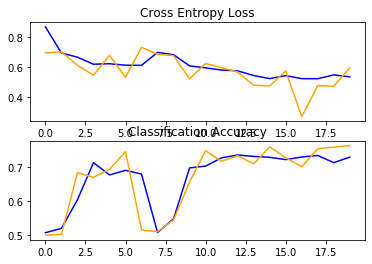

In [9]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
# 	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

### One Block VGG Model

D:\vhcg77\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 4352 images belonging to 2 classes.
Found 2062 images belonging to 2 classes.
{'Female': 0, 'Male': 1}
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 240, 320, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 614400)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               78643328  
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 78,644,353
Trainable params: 78,644,353
Non-trainable params: 0
_________________________________________________________________

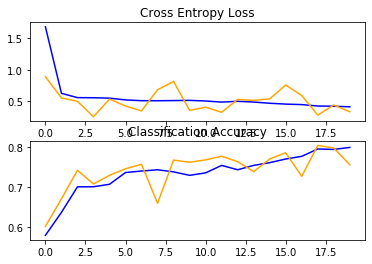

In [10]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
# 	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    
# entry point, run the test harness
run_test_harness()


### Two Block VGG Model 

Using TensorFlow backend.
D:\vhcg77\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 4352 images belonging to 2 classes.
Found 2062 images belonging to 2 classes.
{'Female': 0, 'Male': 1}
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 240, 320, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 80, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 307200)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               39321728  
___________

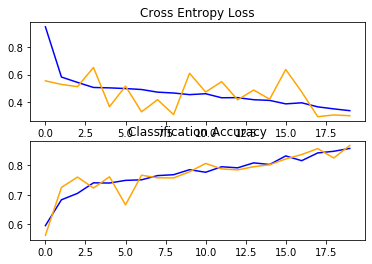

In [6]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model



# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
# 	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

### Three Block VGG Model

D:\vhcg77\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 4352 images belonging to 2 classes.
Found 2062 images belonging to 2 classes.
{'Female': 0, 'Male': 1}
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 240, 320, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 120, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 80, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 80, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 40, 128)       0         
___________

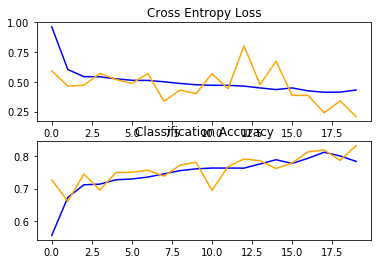

In [7]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model



# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
# 	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

### Develop Model Improvements

#### Dropout Regularization

D:\vhcg77\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 4352 images belonging to 2 classes.
Found 2062 images belonging to 2 classes.
{'Female': 0, 'Male': 1}
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 240, 320, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 120, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 60, 80, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80, 64)        0         
___________

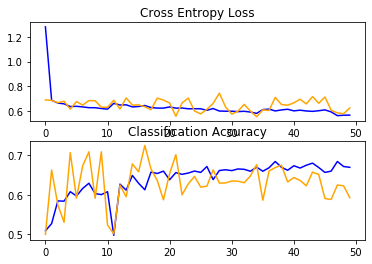

In [9]:
# baseline model with dropout for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
# 	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
        class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
        class_mode='binary', batch_size=64, target_size=(240, 320))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

#### Image Data Augmentation

Using TensorFlow backend.
D:\vhcg77\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 4352 images belonging to 2 classes.
Found 2062 images belonging to 2 classes.
{'Female': 0, 'Male': 1}
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 240, 320, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 80, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 80, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 40, 128)       0         
___________

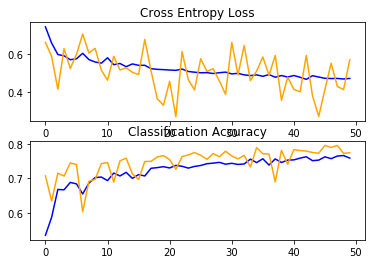

In [3]:
# baseline model with data augmentation for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
# 	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
        width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory(train_path,
        class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = test_datagen.flow_from_directory(test_path,
        class_mode='binary', batch_size=64, target_size=(240, 320))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

### Explore Transfer Learning

D:\vhcg77\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 4352 images belonging to 2 classes.
Found 2062 images belonging to 2 classes.
Epoch 1/10
68/68 [==============================] - 40s 582ms/step - loss: 2.8013 - accuracy: 0.7063 - val_loss: 0.4919 - val_accuracy: 0.8618
Epoch 2/10
68/68 [==============================] - 35s 518ms/step - loss: 0.3070 - accuracy: 0.8656 - val_loss: 0.1636 - val_accuracy: 0.8729
Epoch 3/10
68/68 [==============================] - 36s 528ms/step - loss: 0.2284 - accuracy: 0.9051 - val_loss: 0.1763 - val_accuracy: 0.9336
Epoch 4/10
68/68 [==============================] - 36s 528ms/step - loss: 0.1485 - accuracy: 0.9444 - val_loss: 0.0700 - val_accuracy: 0.9568
Epoch 5/10
68/68 [==============================] - 35s 512ms/step - loss: 0.1617 - accuracy: 0.9285 - val_loss: 0.1230 - val_accuracy: 0.9137
Epoch 6/10
68/68 [==============================] - 35s 508ms/step - loss: 0.1729 - accuracy: 0.9334 - val_loss: 0.3579 - val_accuracy: 0.9437
Epoch 7/10
68/68 [==============================] - 35s 50

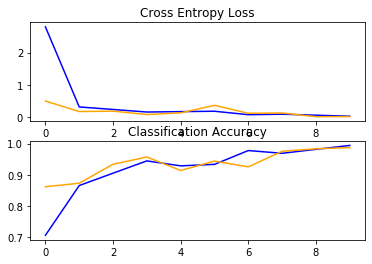

In [5]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(240, 320, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
# 	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

### How to Finalize the Model and Make Predictions

#### Prepare Final Dataset

In [12]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
# create directories
# dataset_home = 'finalize_dogs_vs_cats/'
# create label subdirectories
labeldirs = ['dogs/', 'cats/']

dataset_home = '../data/processed/'
newdir = dataset_home + 'full_train_data'
makedirs(newdir, exist_ok=True)
dataset_home = newdir

for labldir in labeldirs:
	newdir = dataset_home + '/'+ labldir
	makedirs(newdir, exist_ok=True)
# copy training dataset images into subdirectories
src_directory = '../data/raw/train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	if file.startswith('cat'):
		dst = dataset_home  + '/'+  'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + '/'+ 'dogs/'  + file
		copyfile(src, dst)

#### Save Final Model

In [14]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness():
# define model
    train_path = dataset_home
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(dataset_home,
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
    # save model
    model.save('final_model.h5')

# entry point, run the test harness
run_test_harness()

Found 25000 images belonging to 2 classes.


#### Make Prediction

In [16]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
    # load the image
    dataset_home = '../data/processed/'
    img = load_image(dataset_home+'sample_image.jpg')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()

[1.]
